In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import warnings

warnings.filterwarnings('ignore')


plt.style.use('ggplot')


## The Data
We have been provided with 4 individual datasets

Below are the list of datasets which are provided for the analysis:
   + **Cab_Data.csv** – this file includes details of transaction for 2 cab companies, imported as `cabs`.
   + **Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details, imported as `customers`.
   + **Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode, imported as `transactions`.
   + **City.csv** – this file contains list of US cities, their population and number of cab users, imported as `cities`.



In [2]:
# importing datasets
cabs = pd.read_csv('Cab_Data.csv')
customers = pd.read_csv('Customer_ID.csv')
transactions = pd.read_csv('Transaction_ID.csv')
cities = pd.read_csv('City.csv')

In [3]:
# checkings cabs dataset
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# checking customers dataset
customers.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
# checking transactions dataset
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
# checking cities dataset
cities.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
print("Checking the Shape of datasets: ")

print("\tThe Shape of Cabs Dataset is:",cabs.shape)
print("\tThe Shape of Cities Dataset is:",cities.shape)
print("\tThe Shape of Transactions Dataset is:",transactions.shape)
print("\tThe Shape of Customers Dataset is:",customers.shape)

Checking the Shape of datasets: 
	The Shape of Cabs Dataset is: (1998, 7)
	The Shape of Cities Dataset is: (20, 3)
	The Shape of Transactions Dataset is: (1999, 3)
	The Shape of Customers Dataset is: (49171, 4)


We'll explore each dataset now

## Cities Dataset

In [8]:
# Checking datatypes and null counts
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
# Converting columns Population and Users into numeric

cities['Population'] = cities['Population'].replace(",", "", regex=True).astype(int)

cities['Users'] = cities['Users'].replace(",", "", regex=True).astype(int)

In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [11]:
# creating a new column to calculate the percentage of total user per city

cities['Total_Users_%'] = ((cities['Users']/cities['Users'].sum()) * 100).round(2)

In [12]:
# creating a new column to calculate the percentage of users out off cities total population

cities['Population_Users_%'] = ((cities['Users']/cities['Population'])*100).round(2)


In [13]:
# Descdeing order of users

users = cities[['City','Users']].sort_values(by='Users',ascending=False)


''

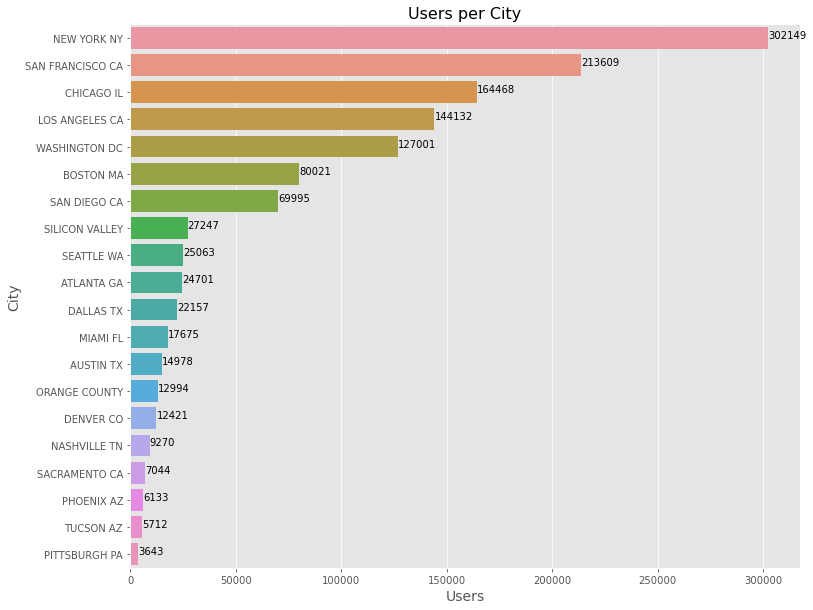

In [14]:
# checking users per city

plt.figure(figsize=(12,10))
a = sns.barplot(x='Users',y='City',data=users,)
for i,v in enumerate(users.Users):
    a.text(v,i, str(int(v)))
    
plt.title("Users per City",fontsize=16)
plt.xlabel("Users", fontsize=14)
plt.ylabel("City", fontsize=14)
;

New York city has the most number of users from both companies. NY has the highest number of cab users followed by San Francisco, Chicago, LA, Washington DC etc.



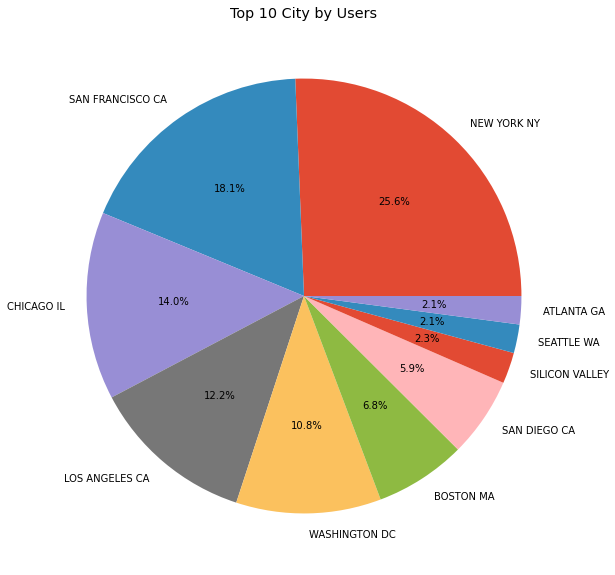

In [15]:
# Top 10 city by users
plt.figure(figsize=(10,10))
plt.pie(users['Users'][:10],labels=users['City'][:10].values,autopct='%1.1f%%')
plt.title("Top 10 City by Users");

The chart above shows the top 10 city with the highest number of cab users which are: NEW YORK NY ,SAN FRANCISCO CA,CHICAGO IL,LOS ANGELES CA,WASHINGTON DC,BOSTON MA,SAN DIEGO CA,SILICON VALLEY,SEATTLE WA,ATLANTA GA

## Transcations Dataset

In [16]:
# Checking datatypes and null counts

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  1999 non-null   int64 
 1   Customer ID     1999 non-null   int64 
 2   Payment_Mode    1999 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [17]:
# checking numerical columns info.

transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1999.0,1.000101e+07,577.205914,10000011.0,10000510.5,10001010.0,10001509.5,10002009.0
Customer ID,1999.0,2.475264e+04,20574.918237,8.0,4775.5,19699.0,43786.5,59965.0


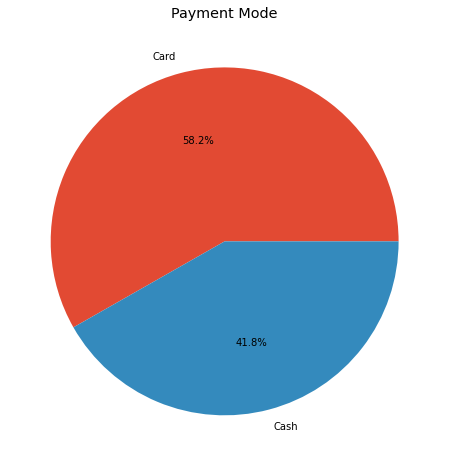

In [18]:
# Contribution pf payment modes

plt.figure(figsize=(10,8))
plt.pie(transactions.Payment_Mode.value_counts(),
        labels=transactions.Payment_Mode.value_counts().keys(),
        autopct="%1.1f%%")

plt.title("Payment Mode");

Users Prefer Card Payment over Cash payment

## Customers Dataset

In [19]:
# Checking datatypes and null counts

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
# checking numerical columns info.

customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


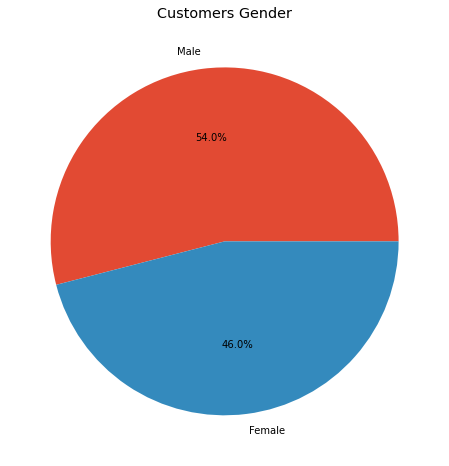

In [21]:
# Customers Gender

plt.figure(figsize=(10,8))
plt.pie(customers.Gender.value_counts(),
        labels=customers.Gender.value_counts().keys(),
        autopct="%1.1f%%")

plt.title("Customers Gender");

We have nearly equal shares of all Male & Females.

## Cabs Dataset

In [22]:
# changing data of travels datatype to datetime

cabs['Date of Travel'] = pd.to_datetime(cabs['Date of Travel'])

In [23]:
# Checking datatypes and null counts

cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  1998 non-null   int64         
 1   Date of Travel  1998 non-null   datetime64[ns]
 2   Company         1998 non-null   object        
 3   City            1998 non-null   object        
 4   KM Travelled    1998 non-null   float64       
 5   Price Charged   1998 non-null   float64       
 6   Cost of Trip    1998 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 109.4+ KB


In [24]:
# checking numerical columns info.

cabs.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1998.0,1.000128e+07,734.816718,10000011.00,1.000065e+07,1.000131e+07,1.000195e+07,10002607.00
KM Travelled,1998.0,2.284948e+01,12.261001,1.90,1.243000e+01,2.268000e+01,3.323000e+01,47.60
Price Charged,1998.0,5.019436e+02,311.829241,22.20,2.447225e+02,4.659200e+02,7.205950e+02,1544.45
Cost of Trip,1998.0,2.904406e+02,158.754446,19.38,1.559430e+02,2.889196e+02,4.213440e+02,668.16


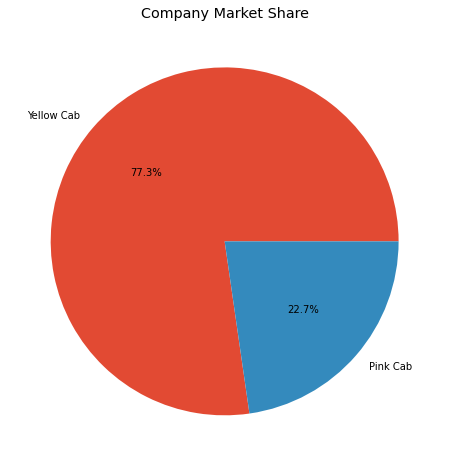

In [25]:
# Company 

plt.figure(figsize=(10,8))
plt.pie(cabs.Company.value_counts(),
        labels=cabs.Company.value_counts().keys(),
        autopct="%1.1f%%")

plt.title("Company Market Share");

## The Global Dataset

In [26]:
# merging transaction & cabs dataset with inner join

trans_cabs = pd.merge(transactions,cabs, on=['Transaction ID'])

In [27]:
trans_cabs.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [28]:
transactions.shape

(1999, 3)

In [29]:
# Merging trans_cabs & customers with inner join

global_data = pd.merge(trans_cabs,customers, on=['Customer ID'])

In [30]:
global_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536


In [31]:
print("The global cab data shape:",global_data.shape)


The global cab data shape: (1558, 12)


In [32]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      1558 non-null   int64         
 1   Customer ID         1558 non-null   int64         
 2   Payment_Mode        1558 non-null   object        
 3   Date of Travel      1558 non-null   datetime64[ns]
 4   Company             1558 non-null   object        
 5   City                1558 non-null   object        
 6   KM Travelled        1558 non-null   float64       
 7   Price Charged       1558 non-null   float64       
 8   Cost of Trip        1558 non-null   float64       
 9   Gender              1558 non-null   object        
 10  Age                 1558 non-null   int64         
 11  Income (USD/Month)  1558 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 158.2+ KB


There are 1558 records with 12 features and zero null values

In [33]:
# Checking for duplicate records

global_data[global_data.duplicated()]

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)


There are no duplicate records.

In [34]:
# checking numerical columns info.

global_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1558.0,1.000101e+07,583.334952,10000011.00,1.000054e+07,1.000093e+07,1.000148e+07,1.000201e+07
Customer ID,1558.0,1.944491e+04,20377.418986,8.00,3.975250e+03,7.631500e+03,3.378000e+04,5.996500e+04
KM Travelled,1558.0,2.263760e+01,12.278440,1.90,1.210000e+01,2.240000e+01,3.299500e+01,4.760000e+01
Price Charged,1558.0,4.781521e+02,303.512623,22.20,2.271900e+02,4.400850e+02,6.878875e+02,1.544450e+03
Cost of Trip,1558.0,2.846348e+02,157.573756,19.38,1.498705e+02,2.801190e+02,4.174690e+02,6.626880e+02
Age,1558.0,3.488639e+01,12.668717,18.00,2.400000e+01,3.200000e+01,4.100000e+01,6.500000e+01
Income (USD/Month),1558.0,1.487244e+04,7953.293530,2035.00,8.145250e+03,1.463550e+04,2.079725e+04,3.496800e+04


## EDA & Feature Engineering

In [35]:
global_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536


In [36]:
# adding month, day, year, day of week columns based on date of travel

global_data['Month'] = global_data['Date of Travel'].dt.month
global_data['Day'] = global_data['Date of Travel'].dt.day
global_data['Year'] = global_data['Date of Travel'].dt.year
global_data['Day_of_week'] = global_data['Date of Travel'].dt.day_of_week

In [37]:
print("The Months in Dataset:\n",global_data['Month'].value_counts())
print("\nThe Years in Dataset:\n",global_data['Year'].value_counts())

print("\nThe Days in Dataset:\n",global_data['Day'].value_counts())

print("\nThe Days_of_Week in Dataset:\n",global_data['Day_of_week'].value_counts())

The Months in Dataset:
 1    1558
Name: Month, dtype: int64

The Years in Dataset:
 2016    1558
Name: Year, dtype: int64

The Days in Dataset:
 9     194
2     181
3     178
10    171
7     141
8     111
6     109
11     70
14     59
12     55
15     54
5      47
17     45
16     43
13     41
18     30
4      25
19      4
Name: Day, dtype: int64

The Days_of_Week in Dataset:
 5    418
6    394
3    200
4    165
2    150
0    125
1    106
Name: Day_of_week, dtype: int64


We have only one month of data jan 2016. So we can remove the `Month` & `Year` column if needed.

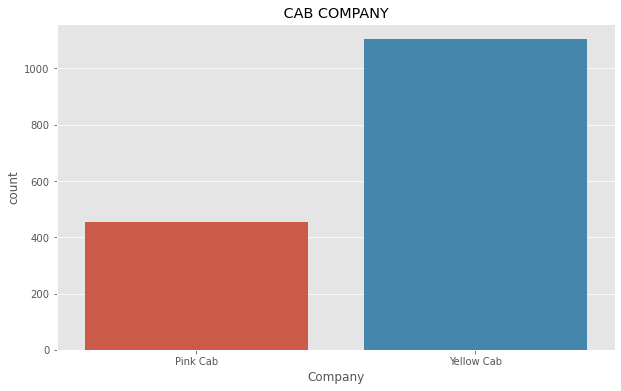

In [38]:
# visualizing the number of pink and yellow cab users

plt.figure(figsize=(10,6))
sns.countplot(global_data.Company)
plt.title(" CAB COMPANY ");



Most Users Travelled with Yellow Cab Company.

In [39]:
# creating Profit colum which is the difference between the price charged and the actual cost of trip

global_data['Profit'] = global_data['Price Charged'] - global_data['Cost of Trip']

global_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Month,Day,Year,Day_of_week,Profit
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,1,8,2016,4,57.315
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,1,6,2016,2,23.666
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,1,2,2016,5,27.568
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,1,7,2016,3,25.798
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,1,3,2016,6,16.844


In [40]:
# Bucketing with customer's age

bucket = [ "{0} - {1}".format(i, i+9) for i in range(10,70,10)]

global_data['Age Group'] = pd.cut(global_data.Age, range(10,75,10),labels=bucket)


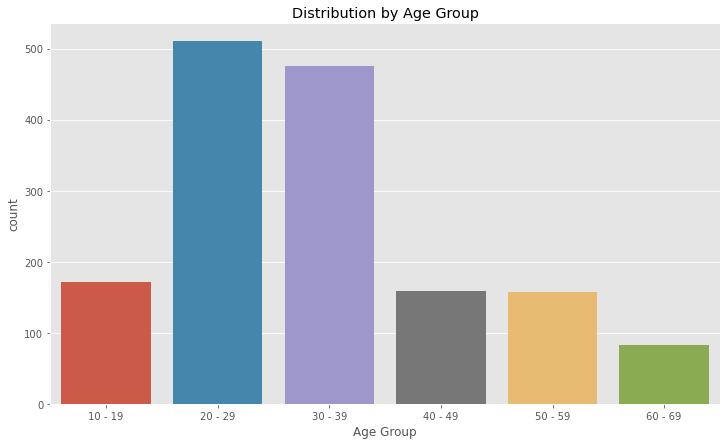

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(global_data["Age Group"])
plt.title("Distribution by Age Group")
plt.show()

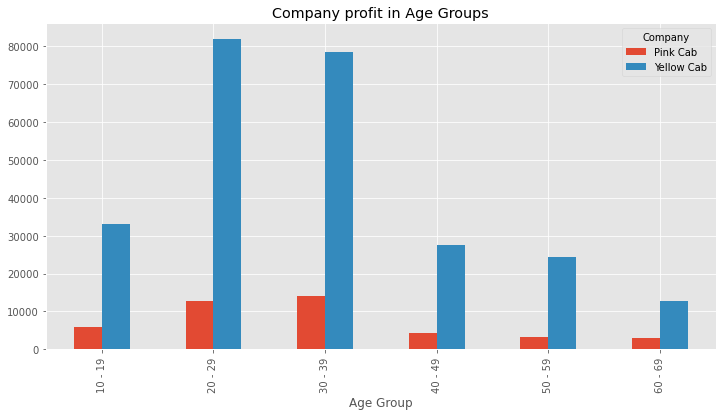

In [42]:
# Profit Analysis in each Group

(global_data.pivot_table(columns='Company',
                         values='Profit',
                         index='Age Group',
                         aggfunc='sum')).plot(kind='bar',
                                             figsize=(12,6),
                                             title='Company profit in Age Groups');
                                              

Yollow Cab Company is making More Profit In each Age Group

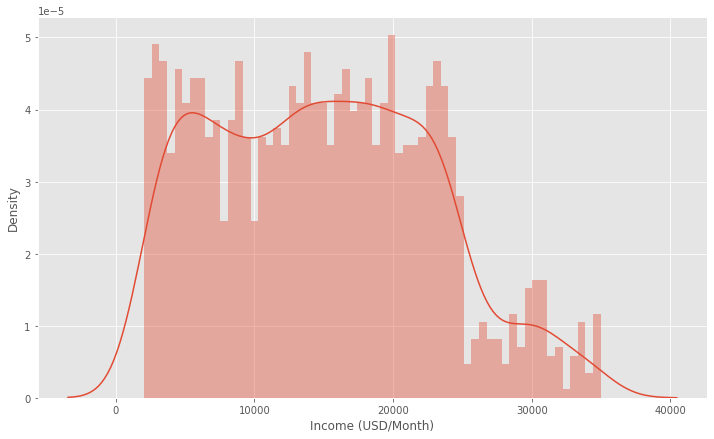

In [43]:
#INCOME 

plt.figure(figsize=(12,7))
sns.distplot(global_data['Income (USD/Month)'],bins=60);

Most users have an income that ranges from 13000 to 20000



In [44]:
# Bucketing with Income Group

bucket = ["{0} - {1}".format(i, i+5000) for i in range(0,35000,5000)]


global_data["Income Group"] = pd.cut(global_data["Income (USD/Month)"],range(0,40000,5000),labels=bucket)

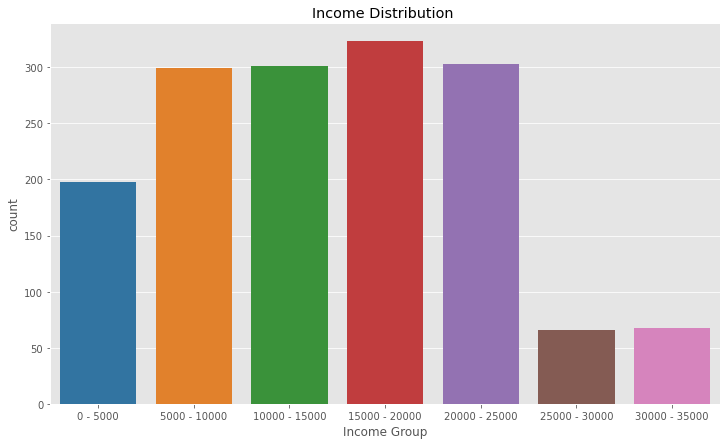

In [45]:
# visualizing income group

plt.figure(figsize=(12,7))
sns.countplot(global_data["Income Group"],palette="tab10")
plt.title("Income Distribution ");

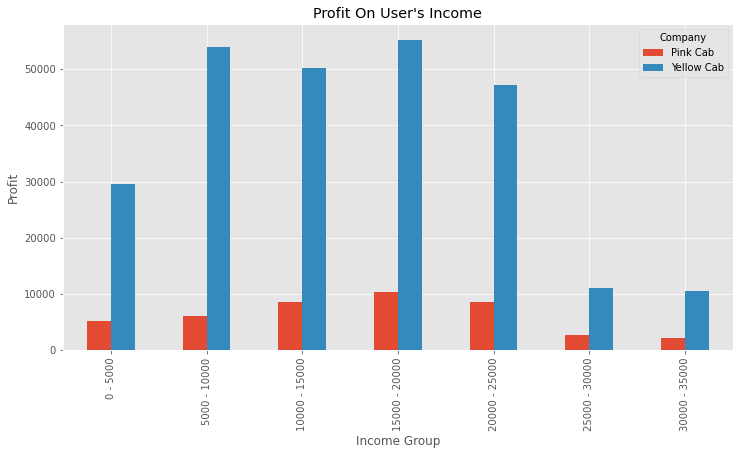

In [46]:
pv_income_profit = global_data.pivot_table(columns='Company',index='Income Group',values='Profit',aggfunc='sum')

pv_income_profit.plot(kind='bar',
                     title="Profit On User's Income",
                     ylabel = "Profit",
                     figsize=(12,6));

Yellow cab company made more profit based on users income



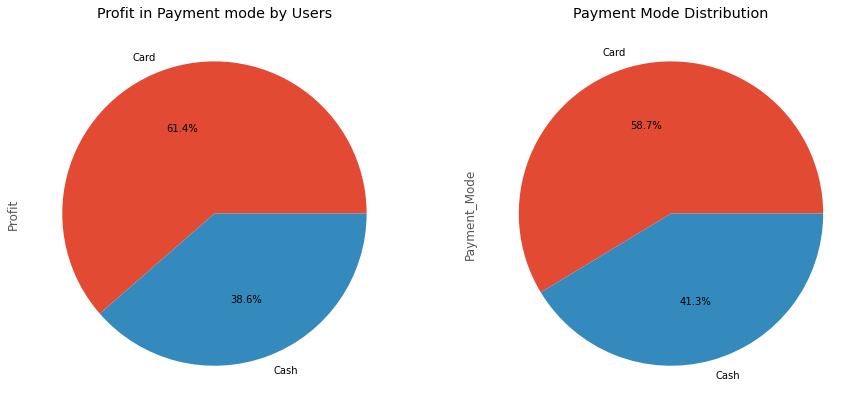

In [47]:
# customer payment mode visualization

plt.figure(figsize=(15,8))

plt.subplot(121)
global_data.groupby('Payment_Mode')['Profit'].sum().plot(kind='pie',
                                                        #y='Payment_Mode',
                                                        autopct='%.1f%%',
                                                         title='Profit in Payment mode by Users'
                                                        )

plt.subplot(122)
global_data['Payment_Mode'].value_counts().plot(kind='pie',
                                                        #y='Payment_Mode',
                                                        autopct='%.1f%%',
                                                         title='Payment Mode Distribution'
                                                        );



58.7% users prefers paying with Card which is 61.4% of Total Profit.

41.3% users prefers paying with Card which is 38.6% of Total Profit.



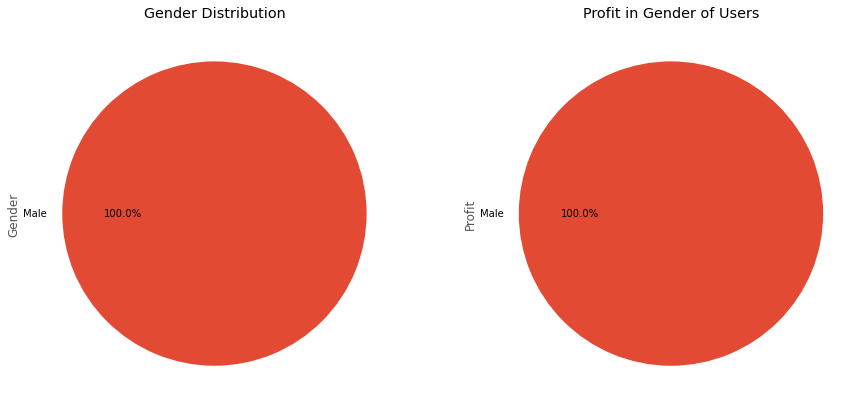

In [48]:
# customer payment mode visualization

plt.figure(figsize=(15,8))

plt.subplot(121)
global_data['Gender'].value_counts().plot(kind='pie',
                                                        #y='Payment_Mode',
                                                        autopct='%.1f%%',
                                                         title='Gender Distribution'
                                                        )

plt.subplot(122)
global_data.groupby('Gender')['Profit'].sum().plot(kind='pie',
                                                        #y='Payment_Mode',
                                                        autopct='%.1f%%',
                                                         title='Profit in Gender of Users'
                                                        );

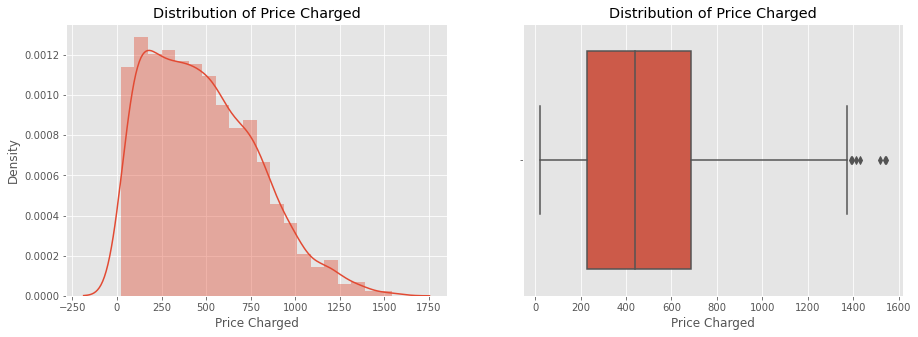

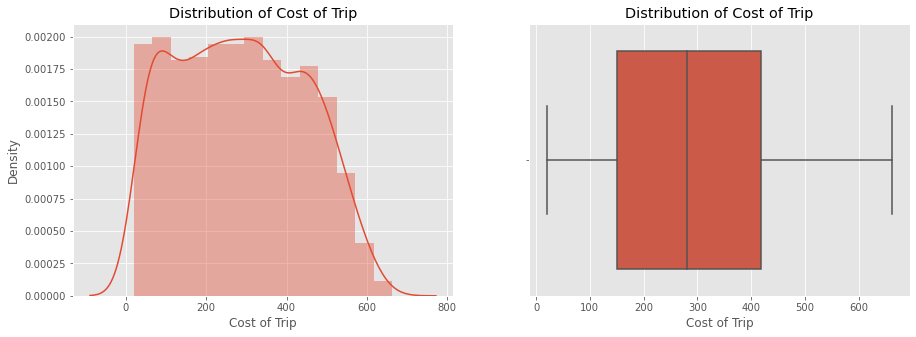

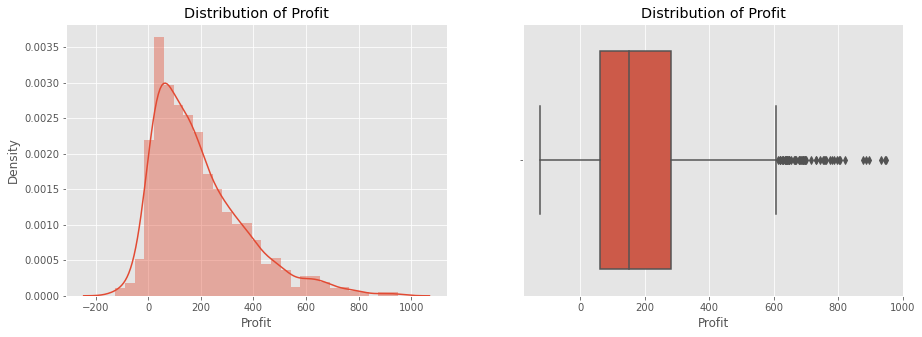

In [49]:
#data visualization of the prices from the global data set


for cols in global_data[['Price Charged','Cost of Trip','Profit']]:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(global_data[cols])
    plt.title(f"Distribution of {cols}")
    
    plt.subplot(1,2,2)
    sns.boxplot(global_data[cols])
    plt.title(f"Distribution of {cols}")
    
    


+ This distributions show that there is a clear difference between the actual cost of trip and the priced charged by both companies.

+ There is presence of outliers in the Profit and Price Charged.

+ There is no Outliers Presence in Cost of Trip.




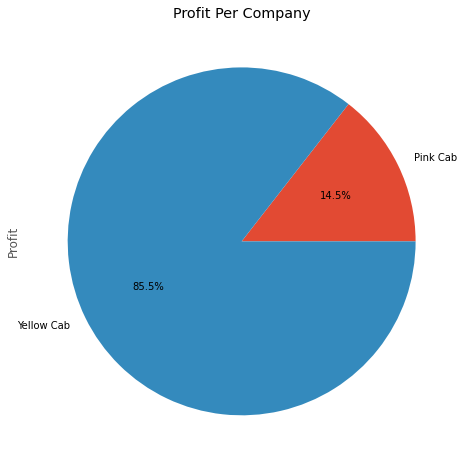

In [50]:
# Profit per company
plt.title(" PROFIT PER COMPANY ")

global_data.groupby(['Company'])['Profit'].sum().plot(kind='pie',
                                                     title="Profit Per Company",
                                                     figsize=(10,8),
                                                     autopct= '%.1f%%');

Yellow cab Company made 85.5% of the total profit



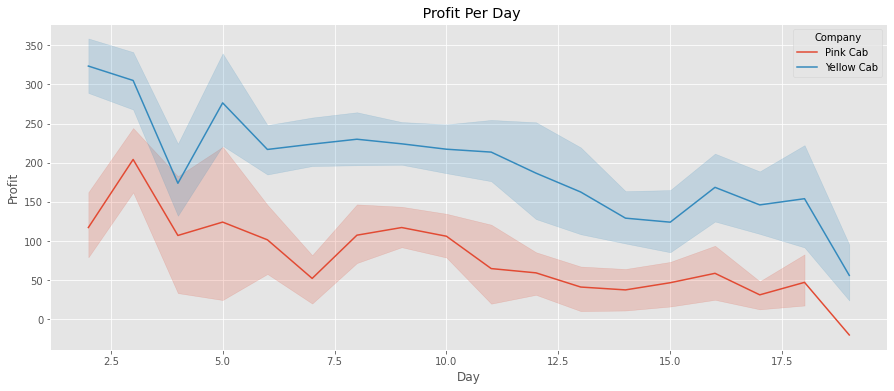

In [51]:
# profit per day
plt.figure(figsize=(15,6))

sns.lineplot(x="Day",
            y="Profit",
            hue="Company",
            data=global_data)
plt.title(" Profit Per Day")
plt.show()


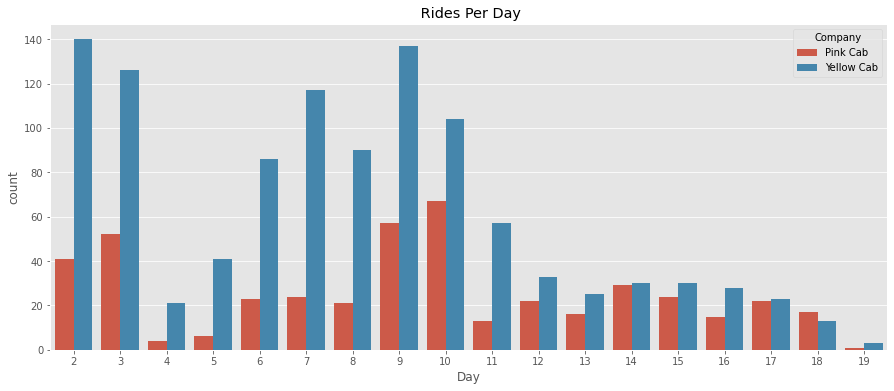

In [52]:
# Rides per Day
plt.figure(figsize=(15,6))

sns.countplot(x="Day",
            #y="Profit",
            hue="Company",
            data=global_data)
plt.title(" Rides Per Day");

Yellow Company is taking more rides and making more profit.

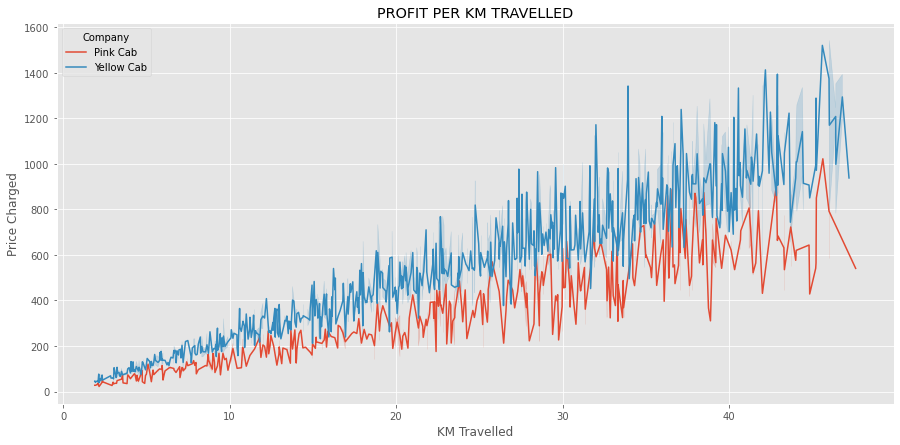

In [53]:
plt.figure(figsize=(15,7))
sns.lineplot(global_data['KM Travelled'],global_data['Price Charged'],hue="Company",data=global_data)
plt.title("PROFIT PER KM TRAVELLED");


The longer the KM travelled the higher the price charges from both company howerver the Yellow cab company charged higher than the Pink cab company



In [54]:
# # Bucketing with the KM traveled

bucket = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

global_data["KM_grouped"] = pd.cut(global_data['KM Travelled'], range(0,55, 10), labels=bucket)

global_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Month,Day,Year,Day_of_week,Profit,Age Group,Income Group,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,1,8,2016,4,57.315,20 - 29,10000 - 15000,30 - 39
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,1,6,2016,2,23.666,20 - 29,5000 - 10000,20 - 29
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,1,2,2016,5,27.568,50 - 59,10000 - 15000,0 - 9
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,1,7,2016,3,25.798,20 - 29,20000 - 25000,30 - 39
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,1,3,2016,6,16.844,30 - 39,5000 - 10000,0 - 9


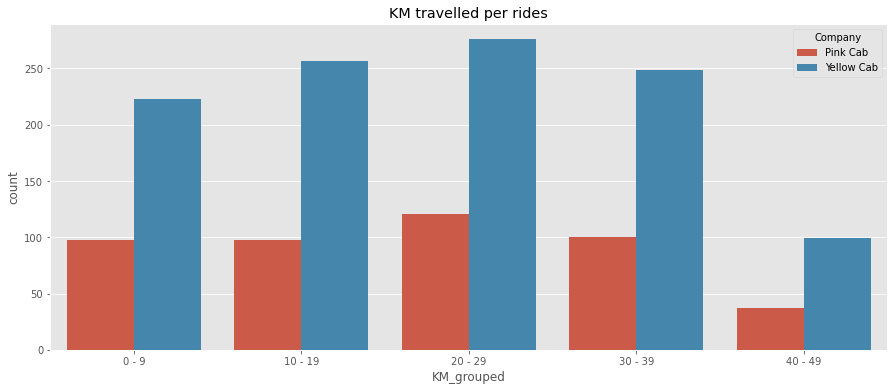

In [55]:
# visualizing the KM counts
plt.figure(figsize=(15,6))
sns.countplot(global_data['KM_grouped'], hue='Company',data=global_data)
plt.title("KM travelled per rides");


Most users take a trip of 10 to 39 km


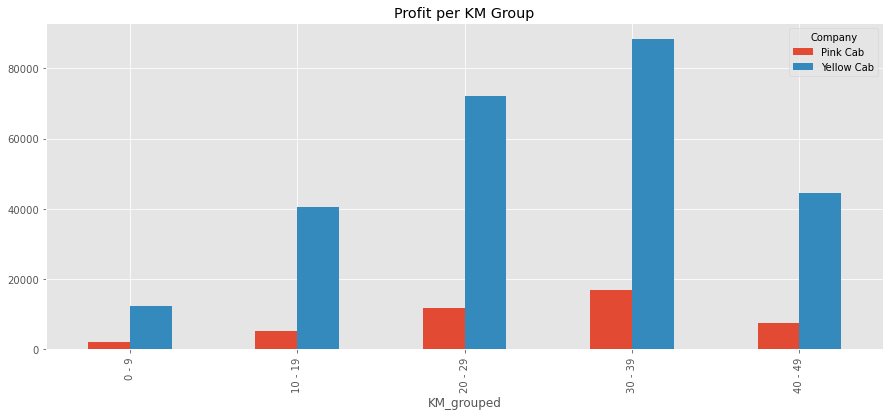

In [56]:


global_data.pivot_table(index='KM_grouped',columns='Company',values='Profit',aggfunc='sum').plot(kind='bar',
                                                                                                figsize=(15,6),
                                                                                                title='Profit per KM Group');

This chart represents the number of Km travelled registed from yellow cab and Pink cab company. Most users took a ride of 10 to 30 KM and Most users choose Yellow cab, from where the yellow cab made more profit compared to the other.



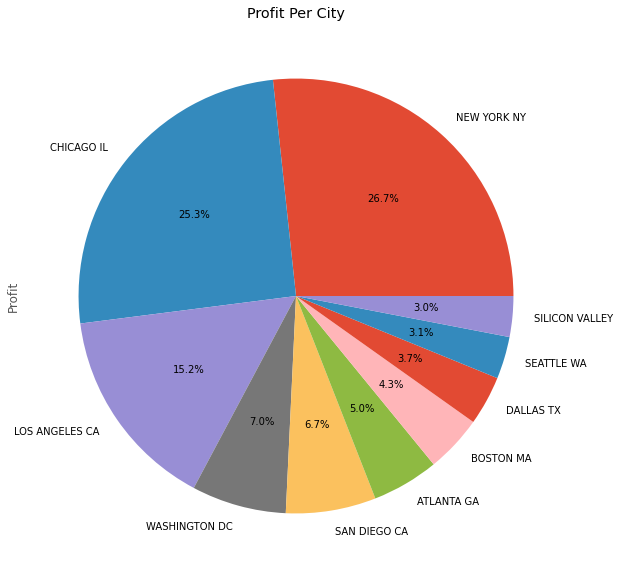

In [57]:
# TOP 10 CITIES WITH THE MOST PROFIT

global_data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).plot(kind='pie',
                                                                                      autopct='%.1f%%',
                                                                                      figsize=(10,10),
                                                                                      title='Profit Per City');

New York City has 26.7% profit, followed by Chicago 25.3%, Los Angeles 15.2%.


This 3 cities contribute more than  65% of profit.


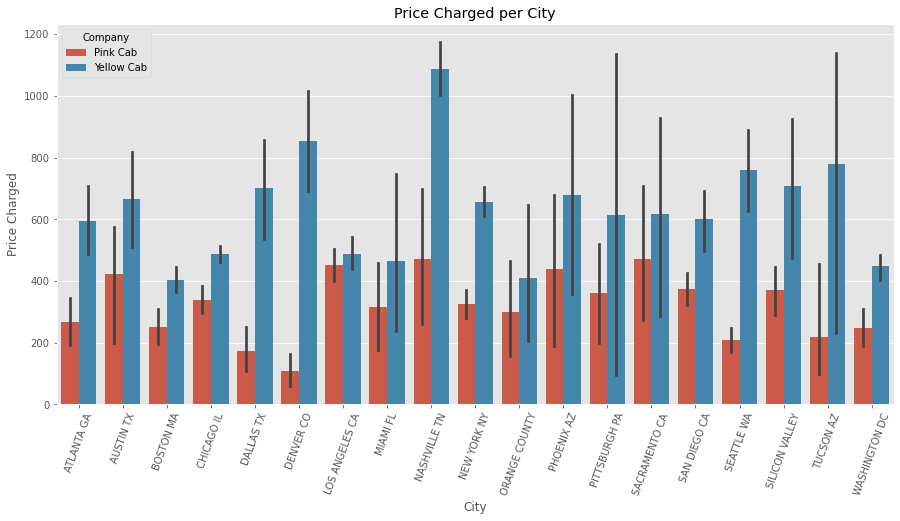

In [58]:
# visualizing the difference between the city and the price charged made by the companies


plt.figure(figsize=(15,7))
sns.barplot(x='City', y='Price Charged', hue='Company', data=global_data)
plt.title("Price Charged per City")
plt.xticks(rotation=70);

Yellow Cab company charges higher than the Pink Cab company in all cities, pink Cab profit looks constant and ranges from 110 to 500 while The yellow cab charges higher in populated city in terms of users and has an insonstant profit that ranges wider.



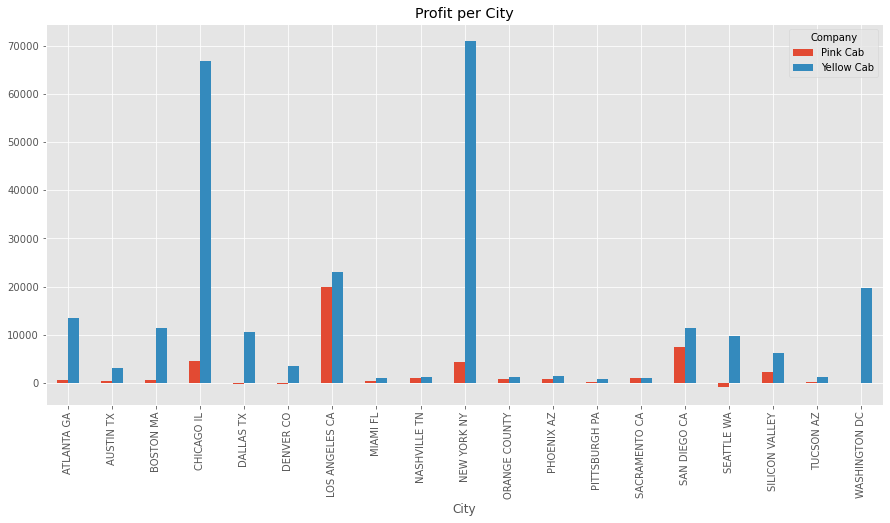

In [59]:
# Profit in Cities

global_data.pivot_table(index='City',columns='Company',values='Profit',aggfunc='sum').plot(kind='bar',
                                                                                          figsize=(15,7),
                                                                                          title='Profit per City');


Cities with more Population have more  profit. 

Yellow cab company made more profit in every city.



In [60]:
# let's take a look at the users

global_data['Customer ID'].value_counts().sort_values(ascending=False).head(10)

4447     3
4690     2
59288    2
4734     2
5964     2
2609     2
3630     2
8927     2
1179     2
268      2
Name: Customer ID, dtype: int64

we can see that no of repeated users is quite low

## THE PINK CAB COMPANY DATA


In [61]:
# pink cab data

pink_cab_data = global_data[global_data['Company']=='Pink Cab']

pink_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Month,Day,Year,Day_of_week,Profit,Age Group,Income Group,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,1,8,2016,4,57.315,20 - 29,10000 - 15000,30 - 39
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,1,6,2016,2,23.666,20 - 29,5000 - 10000,20 - 29
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,1,2,2016,5,27.568,50 - 59,10000 - 15000,0 - 9
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,1,7,2016,3,25.798,20 - 29,20000 - 25000,30 - 39
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,1,3,2016,6,16.844,30 - 39,5000 - 10000,0 - 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,10001746,52973,Cash,2016-01-18,Pink Cab,WASHINGTON DC,10.71,104.64,112.455,Male,30,7678,1,18,2016,0,-7.815,20 - 29,5000 - 10000,10 - 19
1309,10001747,51237,Card,2016-01-17,Pink Cab,WASHINGTON DC,22.80,224.91,262.200,Male,36,23485,1,17,2016,6,-37.290,30 - 39,20000 - 25000,20 - 29
1310,10001748,51900,Card,2016-01-14,Pink Cab,WASHINGTON DC,33.66,325.71,360.162,Male,27,2588,1,14,2016,3,-34.452,20 - 29,0 - 5000,30 - 39
1311,10001749,53438,Card,2016-01-18,Pink Cab,WASHINGTON DC,24.25,232.38,242.500,Male,29,20421,1,18,2016,0,-10.120,20 - 29,20000 - 25000,20 - 29


In [62]:
# Pink Cab Revenue

pc_rev = round(pink_cab_data['Profit'].sum(),2)

print("The Revenue of Pink Cab Company is:",pc_rev)

The Revenue of Pink Cab Company is: 43626.5


In [63]:
# Profit Margin

pc_gross_mar = round((pink_cab_data['Price Charged'].sum() - 
                pink_cab_data['Cost of Trip'].sum()) / pink_cab_data['Price Charged'].sum() * 100, 2)

print("The Gross Profit Margin of Pink Cab Company is:", pc_gross_mar)


The Gross Profit Margin of Pink Cab Company is: 28.06


In [64]:
# Profit per Ride

pc_prof_ride = round(pink_cab_data['Profit'].sum() / len(pink_cab_data),2)

print("The Profit per Ride of Pink Cab Company is:",pc_prof_ride)

The Profit per Ride of Pink Cab Company is: 96.09


## THE YELLOW CAB COMPANY DATA


In [65]:
# pink cab data

yellow_cab_data = global_data[global_data['Company']=='Yellow Cab']

yellow_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Month,Day,Year,Day_of_week,Profit,Age Group,Income Group,KM_grouped
22,10001809,57200,Cash,2016-01-17,Yellow Cab,BOSTON MA,27.54,438.01,337.0896,Male,23,3268,1,17,2016,6,100.9204,20 - 29,0 - 5000,20 - 29
25,10001838,3077,Card,2016-01-09,Yellow Cab,CHICAGO IL,6.48,150.60,90.2016,Male,22,16759,1,9,2016,5,60.3984,20 - 29,15000 - 20000,0 - 9
27,10000624,4734,Card,2016-01-08,Yellow Cab,CHICAGO IL,24.64,540.84,304.5504,Male,33,30608,1,8,2016,4,236.2896,30 - 39,30000 - 35000,20 - 29
35,10001941,5777,Card,2016-01-10,Yellow Cab,CHICAGO IL,38.40,846.70,465.4080,Male,24,28850,1,10,2016,6,381.2920,20 - 29,25000 - 30000,30 - 39
48,10002006,5029,Card,2016-01-17,Yellow Cab,CHICAGO IL,39.27,771.77,490.0896,Male,53,3015,1,17,2016,6,281.6804,50 - 59,0 - 5000,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,10002004,4337,Card,2016-01-09,Yellow Cab,CHICAGO IL,1.90,42.27,25.3080,Male,33,19666,1,9,2016,5,16.9620,30 - 39,15000 - 20000,0 - 9
1554,10002005,3252,Cash,2016-01-09,Yellow Cab,CHICAGO IL,26.52,641.46,353.2464,Male,37,2931,1,9,2016,5,288.2136,30 - 39,0 - 5000,20 - 29
1555,10002007,4176,Card,2016-01-10,Yellow Cab,CHICAGO IL,15.34,413.41,198.8064,Male,31,10528,1,10,2016,6,214.6036,30 - 39,10000 - 15000,10 - 19
1556,10002008,4014,Card,2016-01-14,Yellow Cab,CHICAGO IL,7.68,155.80,99.5328,Male,19,12549,1,14,2016,3,56.2672,10 - 19,10000 - 15000,0 - 9


In [66]:
# Pink Cab Revenue

yc_rev = round(yellow_cab_data['Profit'].sum(),2)

print("The Revenue of Yellow Cab Company is:",yc_rev)

The Revenue of Yellow Cab Company is: 257873.42


In [67]:
# Profit Margin

yc_gross_mar = round((yellow_cab_data['Price Charged'].sum() - 
                yellow_cab_data['Cost of Trip'].sum()) / yellow_cab_data['Price Charged'].sum() * 100, 2)

print("The Gross Profit Margin of Pink Cab Company is:", yc_gross_mar)

The Gross Profit Margin of Pink Cab Company is: 43.75


In [68]:
# Profit per Ride

yc_prof_ride = round(yellow_cab_data['Profit'].sum() / len(yellow_cab_data),2)

print("The Profit per Ride of Pink Cab Company is:",yc_prof_ride)

The Profit per Ride of Pink Cab Company is: 233.58


## Global Data

In [69]:
global_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Month,Day,Year,Day_of_week,Profit,Age Group,Income Group,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,1,8,2016,4,57.3150,20 - 29,10000 - 15000,30 - 39
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,1,6,2016,2,23.6660,20 - 29,5000 - 10000,20 - 29
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Male,53,11242,1,2,2016,5,27.5680,50 - 59,10000 - 15000,0 - 9
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Male,23,23327,1,7,2016,3,25.7980,20 - 29,20000 - 25000,30 - 39
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Male,33,8536,1,3,2016,6,16.8440,30 - 39,5000 - 10000,0 - 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,10002004,4337,Card,2016-01-09,Yellow Cab,CHICAGO IL,1.90,42.27,25.3080,Male,33,19666,1,9,2016,5,16.9620,30 - 39,15000 - 20000,0 - 9
1554,10002005,3252,Cash,2016-01-09,Yellow Cab,CHICAGO IL,26.52,641.46,353.2464,Male,37,2931,1,9,2016,5,288.2136,30 - 39,0 - 5000,20 - 29
1555,10002007,4176,Card,2016-01-10,Yellow Cab,CHICAGO IL,15.34,413.41,198.8064,Male,31,10528,1,10,2016,6,214.6036,30 - 39,10000 - 15000,10 - 19
1556,10002008,4014,Card,2016-01-14,Yellow Cab,CHICAGO IL,7.68,155.80,99.5328,Male,19,12549,1,14,2016,3,56.2672,10 - 19,10000 - 15000,0 - 9


In [70]:
# Global Cab Revenue

gb_rev = round(global_data['Profit'].sum(),2)

print("The Revenue of Yellow Cab Company is:",gb_rev)

The Revenue of Yellow Cab Company is: 301499.92


In [71]:
# Global Profit Margin

gb_gross_mar = round((global_data['Price Charged'].sum() - 
                global_data['Cost of Trip'].sum()) / global_data['Price Charged'].sum() * 100, 2)

print("The Gross Profit Margin of Pink Cab Company is:", gb_gross_mar)

The Gross Profit Margin of Pink Cab Company is: 40.47


In [72]:
# Global Profit per Ride

gb_prof_ride = round(global_data['Profit'].sum() / len(global_data),2)

print("The Profit per Ride of Pink Cab Company is:",gb_prof_ride)

The Profit per Ride of Pink Cab Company is: 193.52


In [73]:
# Getting Summary
dic = {"Company" : ['Pink Cab Company','Yellow Cab Company','Global Data'],
      "Revenue" : [pc_rev, yc_rev,gb_rev],
      "Profit Margin [%]": [ pc_gross_mar, yc_gross_mar,gb_gross_mar],
      "Rides" : [len(pink_cab_data),len(yellow_cab_data),len(global_data)],
      "Profit per Ride [AVG]" : [pc_prof_ride, yc_prof_ride,gb_prof_ride]}

summ = pd.DataFrame(dic)

summ

,Company,Revenue,Profit Margin [%],Rides,Profit per Ride [AVG]
0,Pink Cab Company,43626.50,28.06,454,96.09
1,Yellow Cab Company,257873.42,43.75,1104,233.58
2,Global Data,301499.92,40.47,1558,193.52


## Hypothesis Testing

Areas to investigate:

•	Which company has maximum cab users at a particular time period?

•	Does margin proportionally increase with increase in number of customers?

•	What are the attributes of these customer segments?


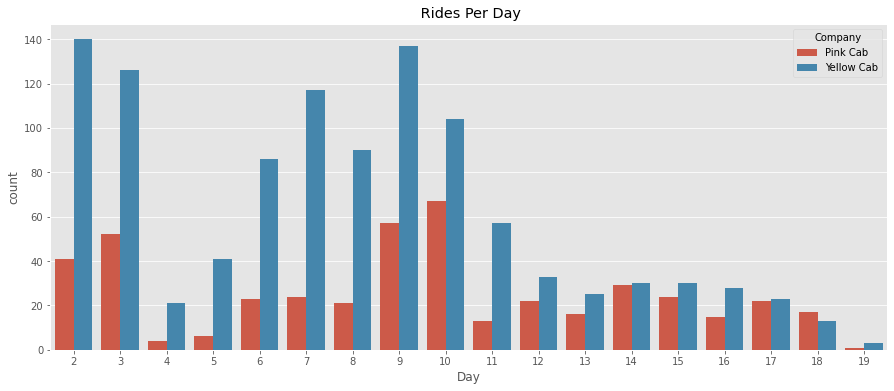

In [74]:
# Rides per Day
plt.figure(figsize=(15,6))

sns.countplot(x="Day",
            #y="Profit",
            hue="Company",
            data=global_data)
plt.title(" Rides Per Day");

In [75]:
from scipy import stats

### 1.Maximum Cab Users

**Which company has maximum cab users at a particular time period?**

We have the data between `2 Jan` to `19 Jan`, so we'll check for the max Cab users in this time/date period 

we'll check whether Yellow cab users are the maximun cab users in our global data

We'll make our hypothesis as bolow:

**Null Hypothesis** `[H0]` - "Yellow Cab Users Are Maximum in Global Data in Date Period"

**Alternate Hypothesis** `[H1]` - "Yellow Cab Users Are Not Maximum in Global Data in Date Period"

In [76]:
# pink cab users
pc_users = pink_cab_data.groupby('Day')['Transaction ID'].count() 

# yellow cab users
yc_users = yellow_cab_data.groupby('Day')['Transaction ID'].count()

# All cab users
gb_users = global_data.groupby('Day')['Transaction ID'].count()



In [77]:
_, p_value_yc  = stats.f_oneway(yc_users,gb_users)

_, p_value_pc  = stats.f_oneway(pc_users,gb_users)


print("The P value with Pink Cab Users is:",p_value_pc)
print("---"*10)

if p_value_pc < 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Pink Cab Users Are Not Maximum in Global Data in Date Period")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Pink Cab Users Are Maximum in Global Data in Date/Time Period")
    

    
print("---"*25)
    
print("The P value with Yellow Cab Users is:",p_value_yc)
print("---"*10)


if p_value_yc < 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Yellow Cab Users Are Not Maximum in Global Data in Date Period")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Yellow Cab Users Are Maximum in Global Data in Date/Time Period")

print("---"*25)



The P value with Pink Cab Users is: 0.000271203324688331
------------------------------
We accept Alternate Hypothesis that there is a statistical difference
Pink Cab Users Are Not Maximum in Global Data in Date Period
---------------------------------------------------------------------------
The P value with Yellow Cab Users is: 0.17425882747731186
------------------------------
We accept Null Hypothesis that there is no statistical difference
Yellow Cab Users Are Maximum in Global Data in Date/Time Period
---------------------------------------------------------------------------


So, We Have Statistically Prove that Yellow Cab Company Have the Maximum Users in the Date/Time Period.

### 2. Margin Proportionality with Increasing Customers

Does margin proportionally increase with increase in number of customers?

We've unique `Transaction Id` so we'll check profit with respect to them.

we'll check whether Profit Margin Increase with Increase in No of Customers in  Yellow and Pink Cab Company 

We'll make our hypothesis as bolow:

**Null Hypothesis** `[H0]` - "Profit Margin Increases with Increase in No of Customers in  Yellow and Pink Cab Company"

**Alternate Hypothesis** `[H1]` - "Profit Margin Does not Increases with Increase in No of Customers in  Yellow and Pink Cab Company"

In [78]:
# All Company Profit Margin
gb_margin = global_data.groupby(['Transaction ID']).Profit.mean()

# Yellow Company Profit Margin
yc_margin = yellow_cab_data.groupby('Transaction ID').Profit.mean()

# Pink Company Profit Margin
pc_margin = pink_cab_data.groupby('Transaction ID').Profit.mean()

In [79]:
# Checking with all at once
_,p_value_all = stats.f_oneway(gb_margin,yc_margin,pc_margin)

print("The P value with All:",p_value_all)
print("---"*10)


if p_value_all < 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Profit Margin Does Not Increases with Increase in No of Customers.")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Profit Margin Increases with Increase in No of Customers.")


print("---"*25)



The P value with All: 1.2865793052940668e-45
------------------------------
We accept Alternate Hypothesis that there is a statistical difference
Profit Margin Does Not Increases with Increase in No of Customers.
---------------------------------------------------------------------------


In [80]:
# Checking global data with Pink Cab Company


_,p_value_gbpc = stats.ttest_ind(gb_margin,pc_margin)



print("The P value with Gloabl & Pink Company Data:",p_value_gbpc)
print("---"*10)


if p_value_gbpc < 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Profit Margin Does Not Increases with Increase in No of Customers in Pink Cab Company.")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Profit Margin Increases with Increase in No of Customers in Pink Cab Company.")


print("---"*25)

The P value with Gloabl & Pink Company Data: 2.395879929877656e-28
------------------------------
We accept Alternate Hypothesis that there is a statistical difference
Profit Margin Does Not Increases with Increase in No of Customers in Pink Cab Company.
---------------------------------------------------------------------------


In [81]:
# Checking Yellow data with Pink Cab Company


_,p_value_pcyc = stats.ttest_ind(yc_margin,pc_margin)



print("The P value with Pink & Yellow Company Data:",p_value_pcyc)
print("---"*10)


if p_value_pcyc < 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Profit Margin Does Not Increases with Increase in No of Customers in Pink/Yellow Cab Company.")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Profit Margin Increases with Increase in No of Customers in Pink/Yellow Cab Company.")


print("---"*25)

The P value with Pink & Yellow Company Data: 1.8908630848986554e-48
------------------------------
We accept Alternate Hypothesis that there is a statistical difference
Profit Margin Does Not Increases with Increase in No of Customers in Pink/Yellow Cab Company.
---------------------------------------------------------------------------


In [82]:
summ

,Company,Revenue,Profit Margin [%],Rides,Profit per Ride [AVG]
0,Pink Cab Company,43626.50,28.06,454,96.09
1,Yellow Cab Company,257873.42,43.75,1104,233.58
2,Global Data,301499.92,40.47,1558,193.52


So, We Can Statistically Say that Profit Margin Does Not Increase with Increasing Users/Customers.

### 3.Attributes of Customer Segments

What are the attributes of these customer segments?

Attributes of Custoners Segments:

**1. Gender:** We Only Have Transactions of Male Users so We can neglect this feature.

**2. Age Group:** This is one of the Important Feature of customers. We have created it from `Age` column.

**3. Income Group:** This is also on of the Important Feature of Customers. We have created it from `Income` Column


We'll Check whether this features are `attributes of Customer Segments` are not.


We'll make our hypothesis as bolow:

**Null Hypothesis** `[H0]` - "Attribute is Part of Customer Segment"

**Alternate Hypothesis** `[H1]` - "Attribute is Not Part of Customer Segment"



#### Age Group

In [83]:
# All Company Profit Margin by Age Group
gb_age = global_data.groupby(['Age Group']).Profit.mean()

# Yellow Company Profit Margin by Age Group
yc_age = yellow_cab_data.groupby('Age Group').Profit.mean()

# Pink Company Profit Margin by Age Group
pc_age = pink_cab_data.groupby('Age Group').Profit.mean()

In [84]:
# Checking hypothesis
_,p_value_age = stats.f_oneway(gb_age,yc_age,pc_age)

print("The P value with Profit Margin by Age Group:",p_value_age)
print("---"*10)


if p_value_age > 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Attribute Age Group is Not Part of Customer Segment")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Attribute Age Group is Part of Customer Segment")


print("---"*25)


The P value with Profit Margin by Age Group: 5.7224559830861136e-08
------------------------------
We accept Null Hypothesis that there is no statistical difference
Attribute Age Group is Part of Customer Segment
---------------------------------------------------------------------------


#### Income Group

In [85]:
# All Company Profit Margin by Income Group
gb_income = global_data.groupby(['Income Group']).Profit.mean()

# Yellow Company Profit Margin by Income Group
yc_income = yellow_cab_data.groupby('Income Group').Profit.mean()

# Pink Company Profit Margin by Income Group
pc_income = pink_cab_data.groupby('Income Group').Profit.mean()

In [86]:
# Checking hypothesis
_,p_value_income = stats.f_oneway(gb_income,yc_income,pc_income)

print("The P value with Profit Margin by Income Group:",p_value_income)
print("---"*10)


if p_value_income > 0.05:
    print('We accept Alternate Hypothesis that there is a statistical difference')
    print("Attribute Income Group is Not Part of Customer Segment")

    
else:
    print('We accept Null Hypothesis that there is no statistical difference')
    print("Attribute Income Group is Part of Customer Segment")


print("---"*25)


The P value with Profit Margin by Income Group: 1.063098937942807e-12
------------------------------
We accept Null Hypothesis that there is no statistical difference
Attribute Income Group is Part of Customer Segment
---------------------------------------------------------------------------


So, The Customer Segment Attributes are **`Age Group` or `Age`** and **`Income Group` or `Income`**

## CONCLUSION

I believe that Yellow cab going to maintain its monopoly in the market for a longer period of time because: 
1. Yellow cab has a very high customer retainability rate compared to Pink Cab. 
2. Yellow cab has had the most customers and is not showing any signs of letting go off this trend. 
3. Yellow cab a high customer following in high population cities like New York, Chicago, Los Angeles. 
4. Most of the young aged customers prefer Yellow Cab. It is to be noted that the young aged customers are the biggest consumers in this cab business. 
5. Yellow cab seems to be making a higher profit margin compared to Pink cab Company.

**We will advise the XYZ company to invest in `Yellow Cab company` for its glorious benefit.**